In [1]:
import xarray as xr
import pandas as pd
import netCDF4 as nc
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import numpy as np
import cftime
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

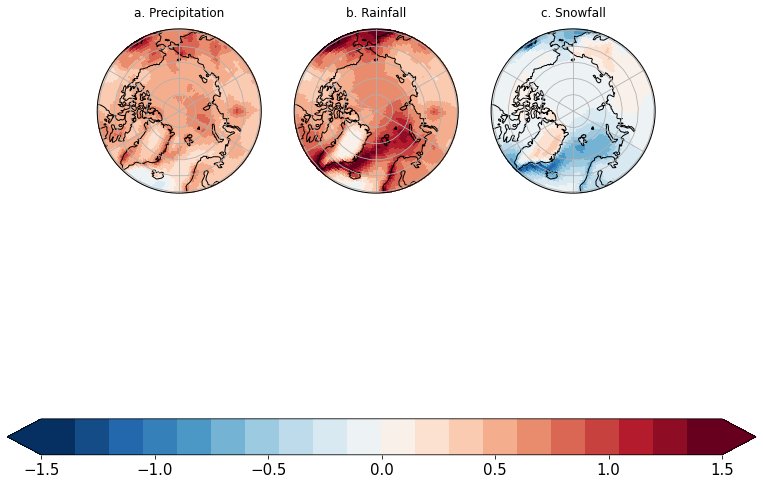

In [11]:
#cell for pr, prsn and prrf

#Load data file
#Locate Files
file1 = r'C:\Users\Asus\Desktop\Masters Project\Data\pr_actual\pr_decade\pr_anomaly_mean-model-REGRID-without-CESM2.nc'
file2 = r'C:\Users\Asus\Desktop\Masters Project\Data\pr_actual\prsn_decade\prrf_anomaly_mean-model-REGRID-without-CESM2.nc'
file3 = r'C:\Users\Asus\Desktop\Masters Project\Data\pr_actual\prsn_decade\prsn_anomaly_mean-model-REGRID.nc'


#open nc file into xarray dataset
pr = xr.open_dataset(file1, decode_times=True, use_cftime=True)
prrf = xr.open_dataset(file2, decode_times=True, use_cftime=True)
prsn = xr.open_dataset(file3, decode_times=True, use_cftime=True)


fig = plt.figure(1, figsize=[10,10])
# Define circle for projection area
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts*radius+center)

# Discrete colourmap
cmap = mpl.cm.get_cmap('RdBu_r', 20)

# Use cartopy and plot in LambertAzimuthal specify latitude center
ax = fig.add_subplot(1, 3, 1, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax2.coastlines()
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax3.coastlines()


# Transform projection
cs = pr['unknown'].plot(ax=ax,transform=ccrs.PlateCarree(),vmin = -1.5, vmax = 1.5,cmap = cmap,add_colorbar = False)
cs2 = prrf['unknown'].plot(ax=ax2,transform=ccrs.PlateCarree(),vmin = -1.5, vmax = 1.5,cmap = cmap,add_colorbar = False)
cs3 = prsn['unknown'].plot(ax=ax3,transform=ccrs.PlateCarree(),vmin = -1.5, vmax = 1.5,cmap = cmap,add_colorbar = False)


# Set the gridlines and boundaries for projection, crop away outside points with no data
ax.gridlines()
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 90, 59.5], ccrs.PlateCarree())
ax2.gridlines()
ax2.set_boundary(circle, transform=ax2.transAxes)
ax2.set_extent([-180, 180, 90, 59.5], ccrs.PlateCarree())
ax3.gridlines()
ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.set_extent([-180, 180, 90, 59.5], ccrs.PlateCarree())


# Title name

ax.set_title('a. Precipitation',fontsize = 12 , y = 1.04)
ax2.set_title('b. Rainfall',fontsize = 12 , y = 1.04)
ax3.set_title('c. Snowfall',fontsize = 12 , y = 1.04)


# Edit colour bar location
cbar_ax = fig.add_axes([0, 0.025, 1.04, 0.05])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', extend='both', pad = -5)

cbar.ax.tick_params(labelsize=15)



In [ ]:
plt.savefig('C:/Users/Asus/Desktop/Masters Project/Graphs/Precipitation_Plot.png', dpi=300, bbox_inches='tight')